<a href="https://colab.research.google.com/github/AY0ungKim/AI-Study/blob/main/Neural_Networks_and_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*서울대학교 데이터사이언스대학원 머신러닝 및 딥러닝 이준석 교수님 수업 정리*


---



- Image classifier with pre-extracted features


> : Image의 pixel 단위를 대상으로 training하는 것이 아니라, image의 특성인 **feature**에 대해 어떠한 알고리즘을 통해 ouput인 class를 추출하자

> 이때, input 이미지에서 label y까지 쭉 훈련시키는 과정을 **end-to-end** 과정이라고 칭함 (만약 배경지식이 있다면 중간의 사람의 개입을 줘도 괜찮음)

<br/>

## 1. **Neraul Networks**


- Perceptron (without hidden layer)

> 아래 그림처럼, input x1, x2에 대해 가중치 w1,w2가 있어서, f(w1x1+w2x2)인 꼴로 y output을 만들어내는 하나의 가장 작은 단위

> 이때, f를 activation function이라고 함

> 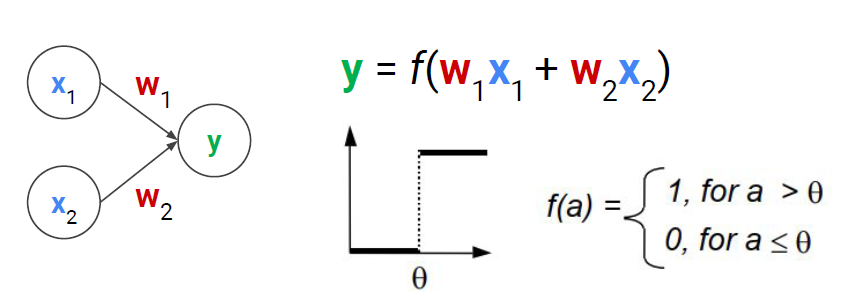


> *single layer*에서 x가 d차원이고, class s가 10차원이라면, W는 c x d 차원이여야 함

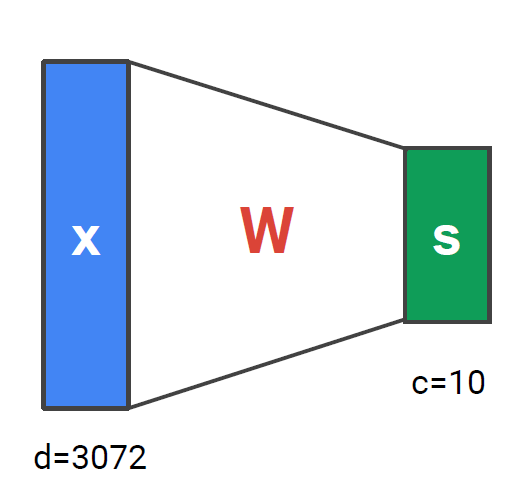


>> W = 3072 X 10 차원

- With hidden layer

> 아래 그림처럼, input X와 output Y사이에 **hidden layer** h1, h2가 있으면 더 복잡한 문제들을 해결할 수 있음 (XOR 문제 해결)


> 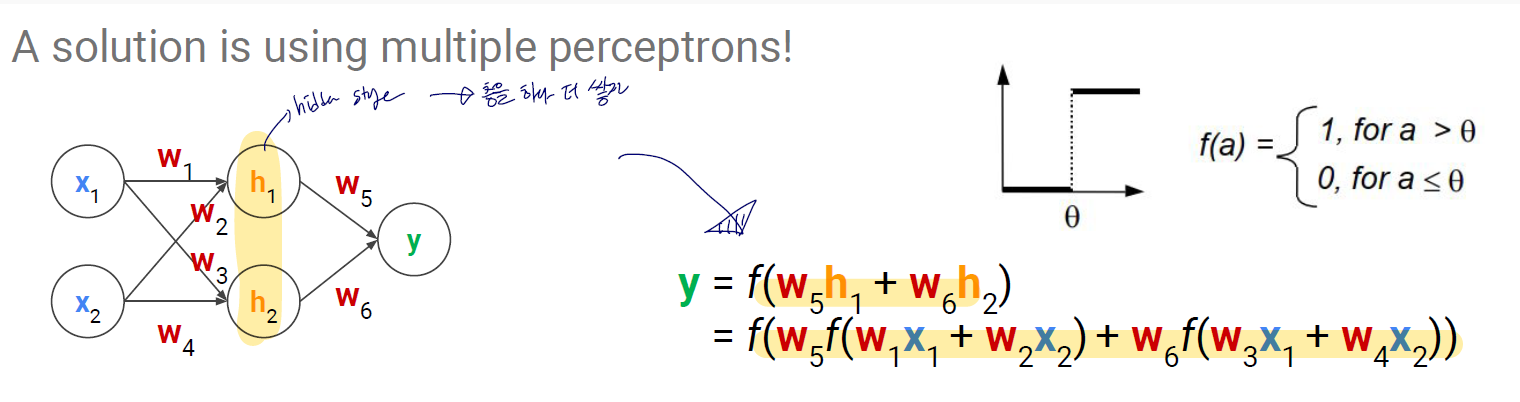

>> 즉, multilayer perceptron (MLP)에서는 x-h 경로의 W1, h-s 경로의 W2는 각각 input과 output의 차원을 곱한 차원 필요함


>> 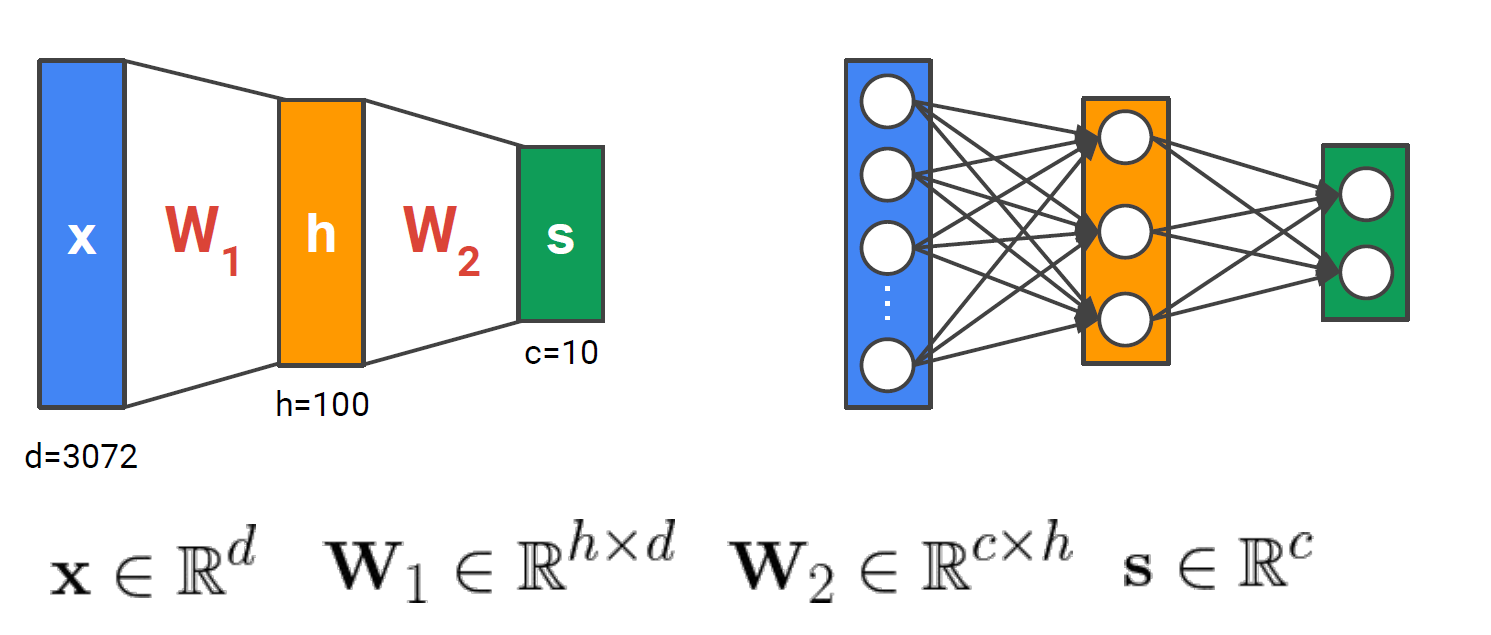

>> hidden layer가 존재할 때도, 각 경로에는 activation function이 필요함

>> 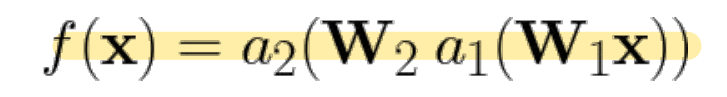

>> 이 activation function으로 주로 sigmoid, tanh, ReLU를 사용

- **Weight** 최적화시키기 (parameter training)

> 다음과 같은 MLP 가정

>> 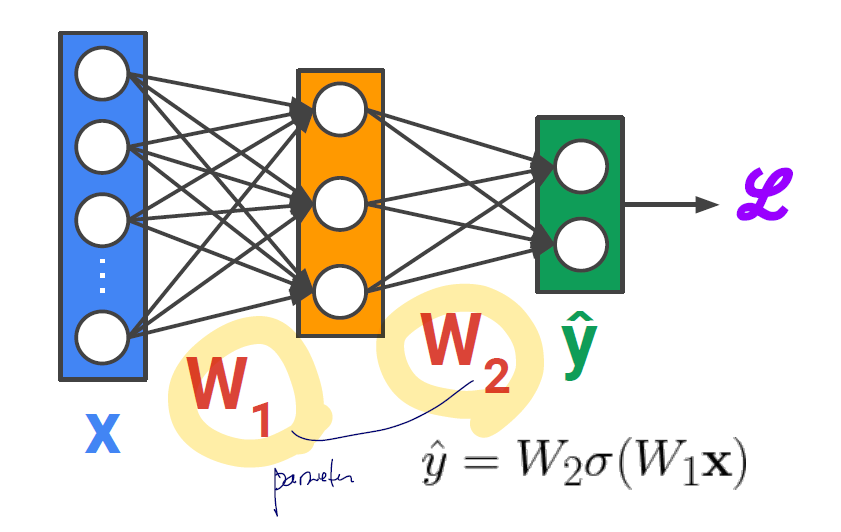


> **Gradient descent** 방법 이용하면, 다음과 같은 두가지 parameter에 대한 gradient를 구할 수 있음 (h=sigomid function 가정)

>> 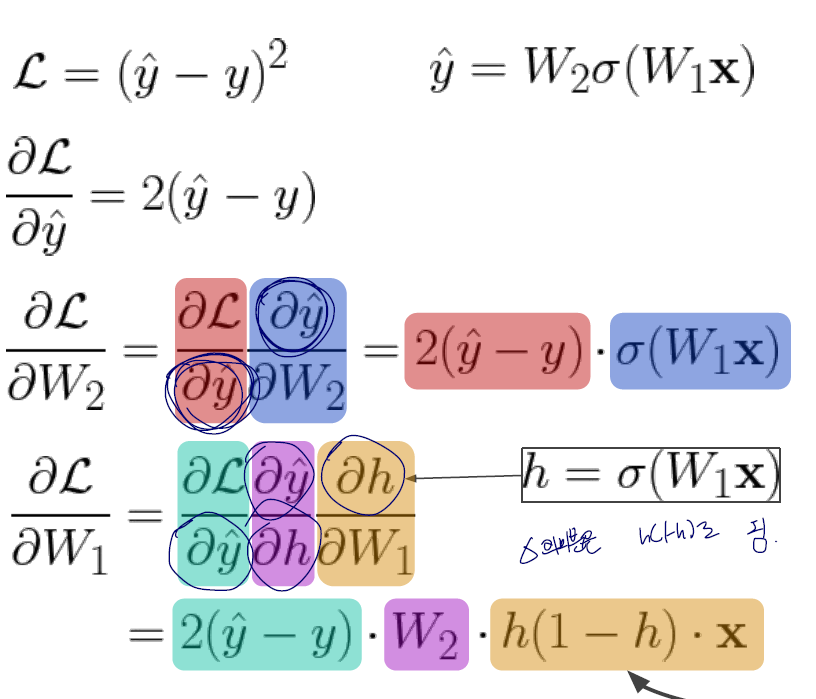

- 코드로 보여주는 예시

> n=example 개수, d= input 차원, d= hidden layer 차원, c=class 개수

In [ ]:
import numpy as np
from numpy.random import randn

n, d, h, c = 64, 1000, 100, 10
x, y = randn(n, d), randn(n, c)
w1, w2 = randn(d, h), randn(h, c)
learning_rate = 1e-4

for t in range(1000):
  h = 1 / (1 + np.exp(-x.dot(w1))) #sigmoid activation function (x*w1=h)
  y_pred = h.dot(w2) # h*w2=y
  loss = np.square(y_pred - y).sum() #loss= y_hat-y의 제곱
  print(t, loss)

  #gradient 계산
  grad_y_pred = 2.0 * (y_pred - y) #loss/y_hat
  grad_w2 = h.T.dot(grad_y_pred) #loss/w2
  grad_h = grad_y_pred.dot(w2.T) #loss/y_hat * y_hat/h
  grad_w1 = x.T.dot(grad_h * h * (1 - h)) #loss/w1

  #gradient 계산한 걸로 업데이트
  w1 -= learning_rate * grad_w1
  w2 -= learning_rate * grad_w2

## **2. Backpropagation**

- 최적의 weight를 추정하기 위해서는 최종 loss에 대한 각 weight의 gradient 계산이 필요 -> **Backpropagation**을 이용한 **chain rule** 이용해서 연쇄적인 계산으로 구할 수 있음

- chain rule

>> 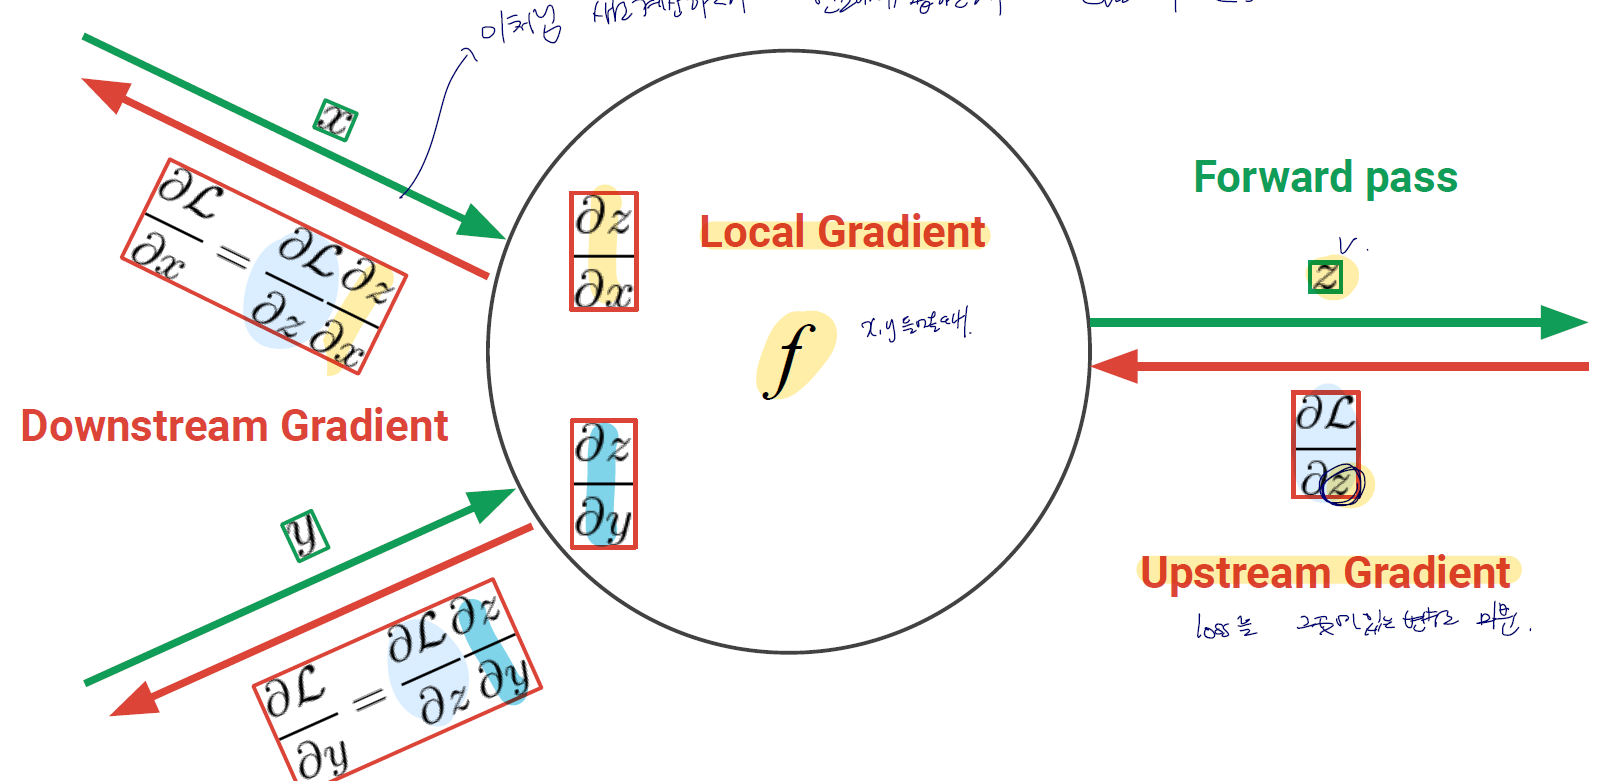


>>> Downstream Gradient = Upstream Gradient * f'(forward x)



- 이를 적용하면 아래와 같은 gradient 생성 가능


>> 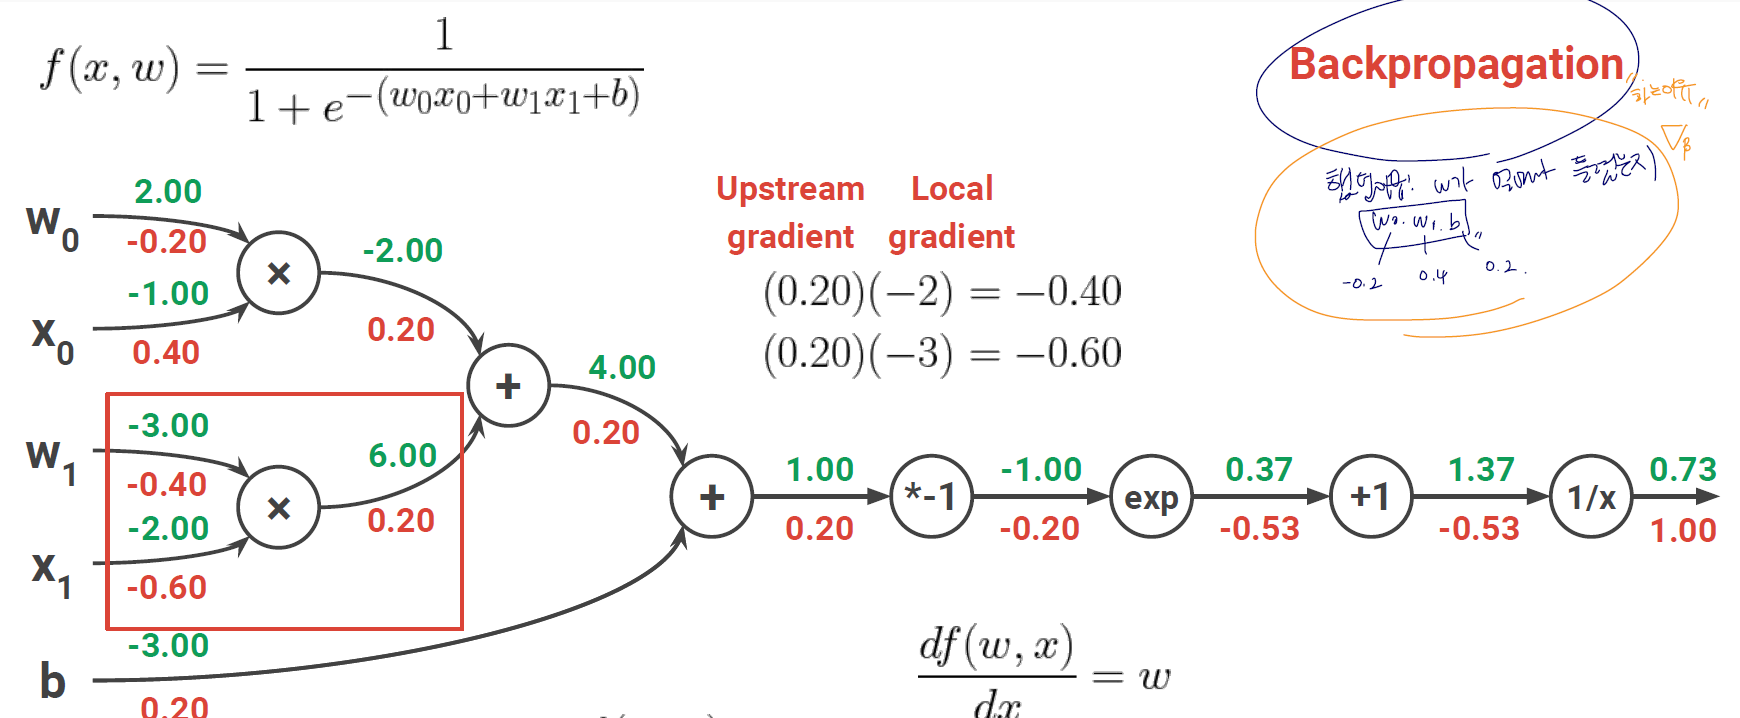

- vector 형태에서 backpropagation

> local gradient가 downstream gradient의 차원 x upstream gradient의 차원이여야 함

> 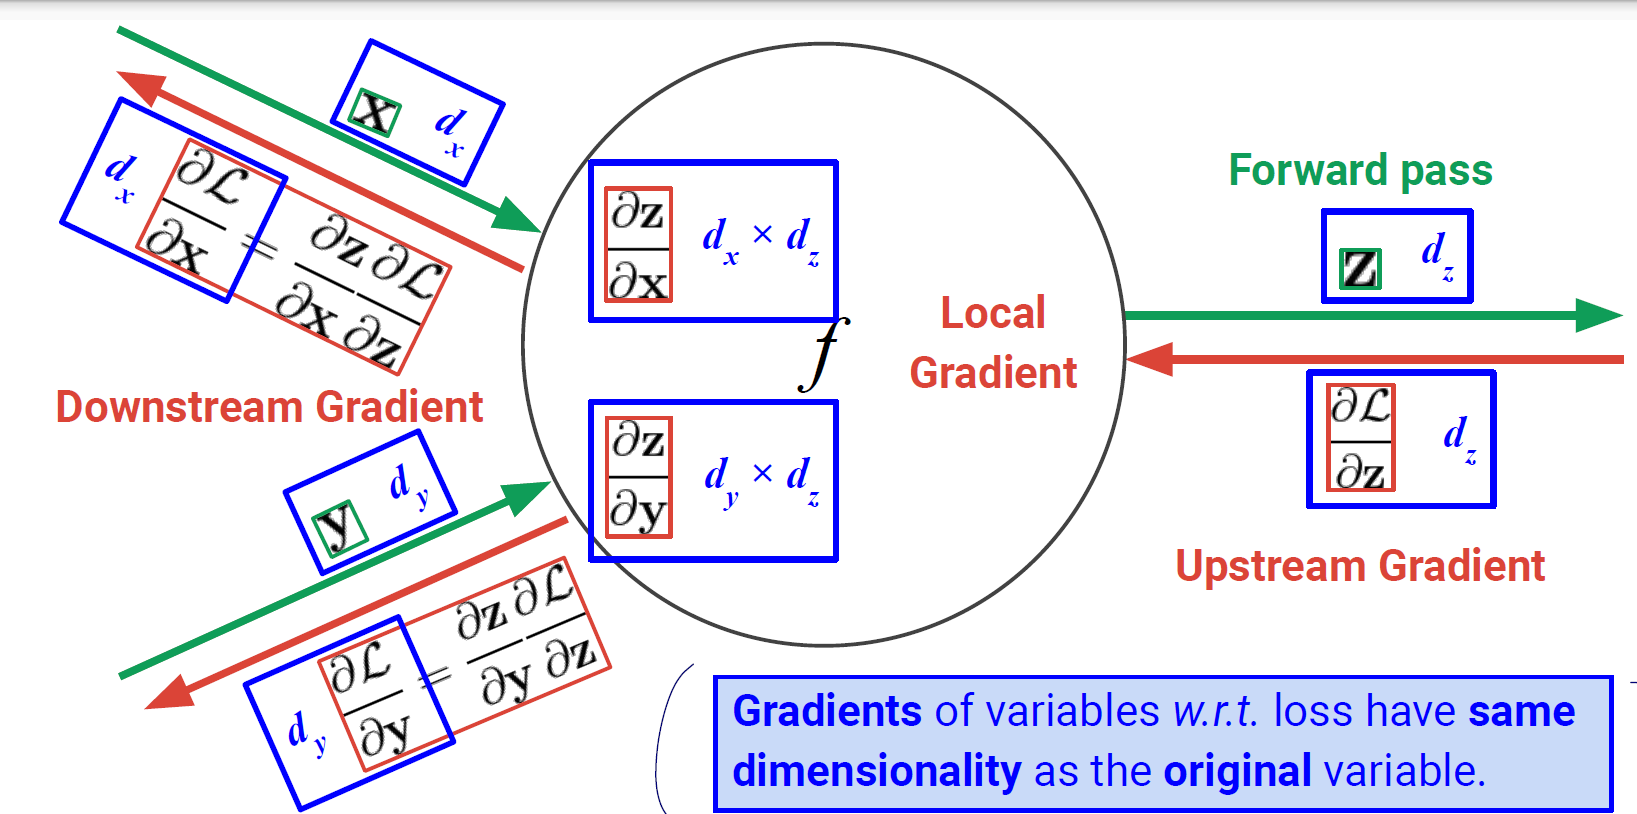

- matric 형태에서 backpropagation

> 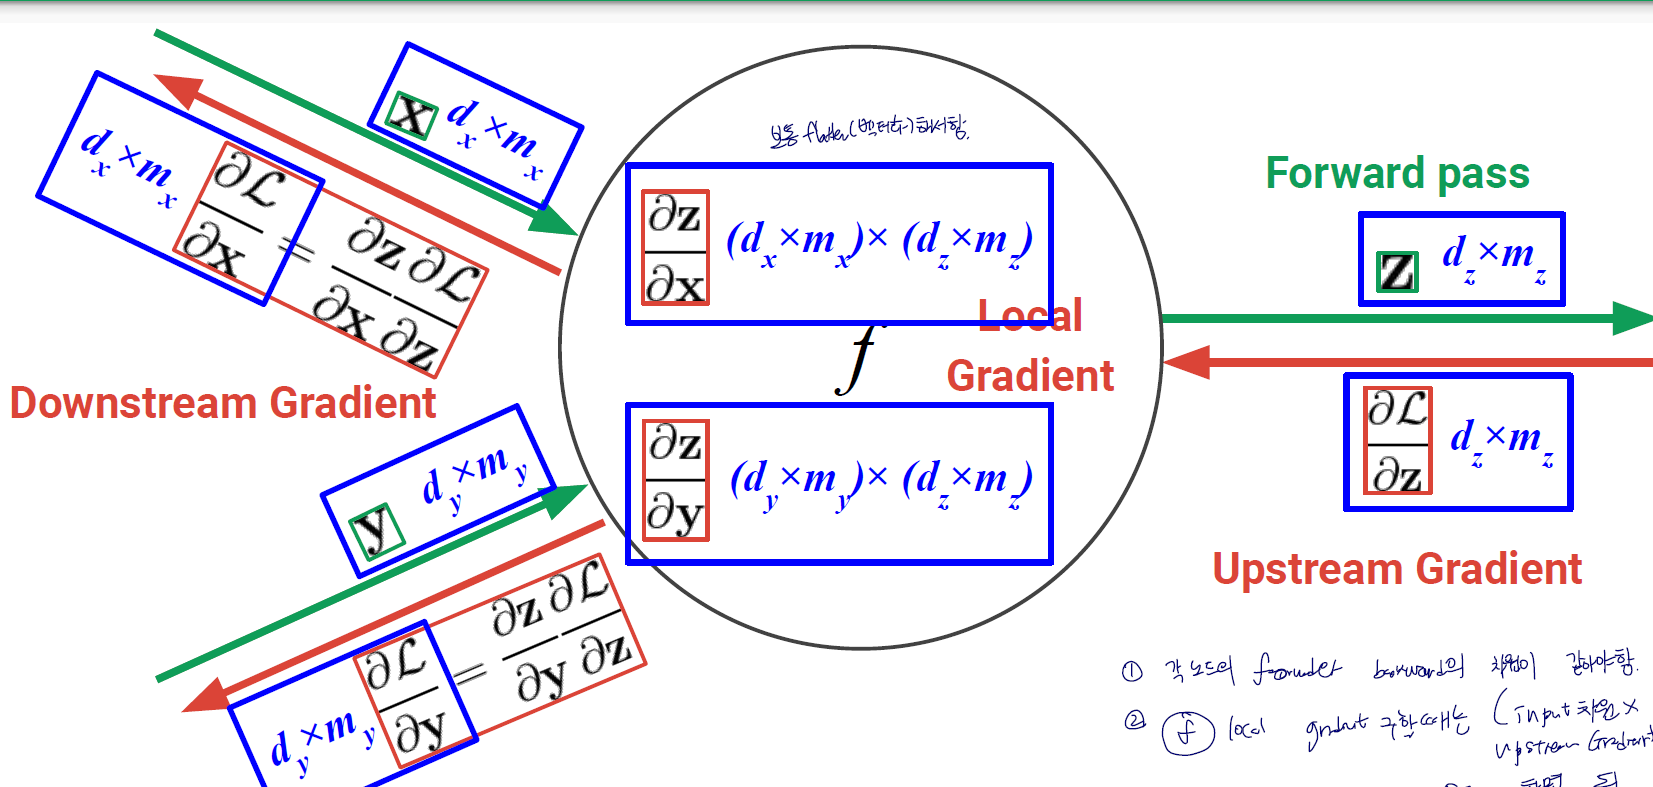